Let's train harder and see problems

In [110]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
from torch import optim
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap='Greys_r')
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [111]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               ])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

torch.Size([64, 1, 28, 28]) torch.Size([64])
tensor(0)


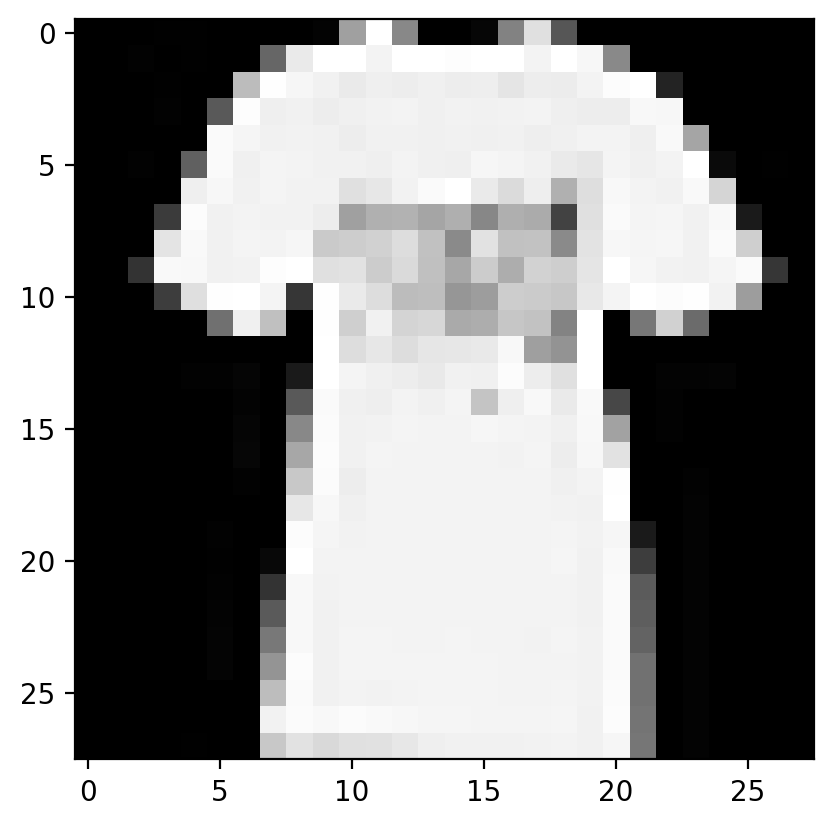

In [112]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)
print(labels[0])
plt.imshow(images[0].squeeze(), cmap='Greys_r');

In [113]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        
        return x

model = Network()

In [59]:
epochs = 30
model = Network()
optimizer = optim.SGD(model.parameters(), lr=0.003)
criterion = nn.NLLLoss()

train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        tot_test_loss = 0
        test_correct = 0  # Number of correct predictions on the test set
        
        with torch.no_grad():
            for images, labels in testloader:
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
                
                output = model(images)
                loss = criterion(output, labels)
                
                tot_test_loss += loss.item()

                ps = torch.exp(output)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                test_correct += equals.sum().item()
                
        # Get mean loss to enable comparison between train and test sets
        train_loss = running_loss / len(trainloader)
        test_loss = tot_test_loss / len(testloader)

        # At completion of epoch
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss),
              "Test Loss: {:.3f}.. ".format(test_loss),
              "Test Accuracy: {:.3f}".format(test_correct / len(testloader.dataset)))

Training loss: 2.1430310741670606
Epoch: 1/30..  Training Loss: 2.143..  Test Loss: 1.822..  Test Accuracy: 0.503
Training loss: 1.3979214338986858
Epoch: 2/30..  Training Loss: 1.398..  Test Loss: 1.120..  Test Accuracy: 0.631
Training loss: 0.9809526956793088
Epoch: 3/30..  Training Loss: 0.981..  Test Loss: 0.900..  Test Accuracy: 0.664
Training loss: 0.8273281132234439
Epoch: 4/30..  Training Loss: 0.827..  Test Loss: 0.796..  Test Accuracy: 0.707
Training loss: 0.7469777668526432
Epoch: 5/30..  Training Loss: 0.747..  Test Loss: 0.736..  Test Accuracy: 0.731
Training loss: 0.6941169757705762
Epoch: 6/30..  Training Loss: 0.694..  Test Loss: 0.695..  Test Accuracy: 0.751
Training loss: 0.6540174948444752
Epoch: 7/30..  Training Loss: 0.654..  Test Loss: 0.659..  Test Accuracy: 0.764
Training loss: 0.6220943278658873
Epoch: 8/30..  Training Loss: 0.622..  Test Loss: 0.630..  Test Accuracy: 0.777
Training loss: 0.5964938000893034
Epoch: 9/30..  Training Loss: 0.596..  Test Loss: 0.61

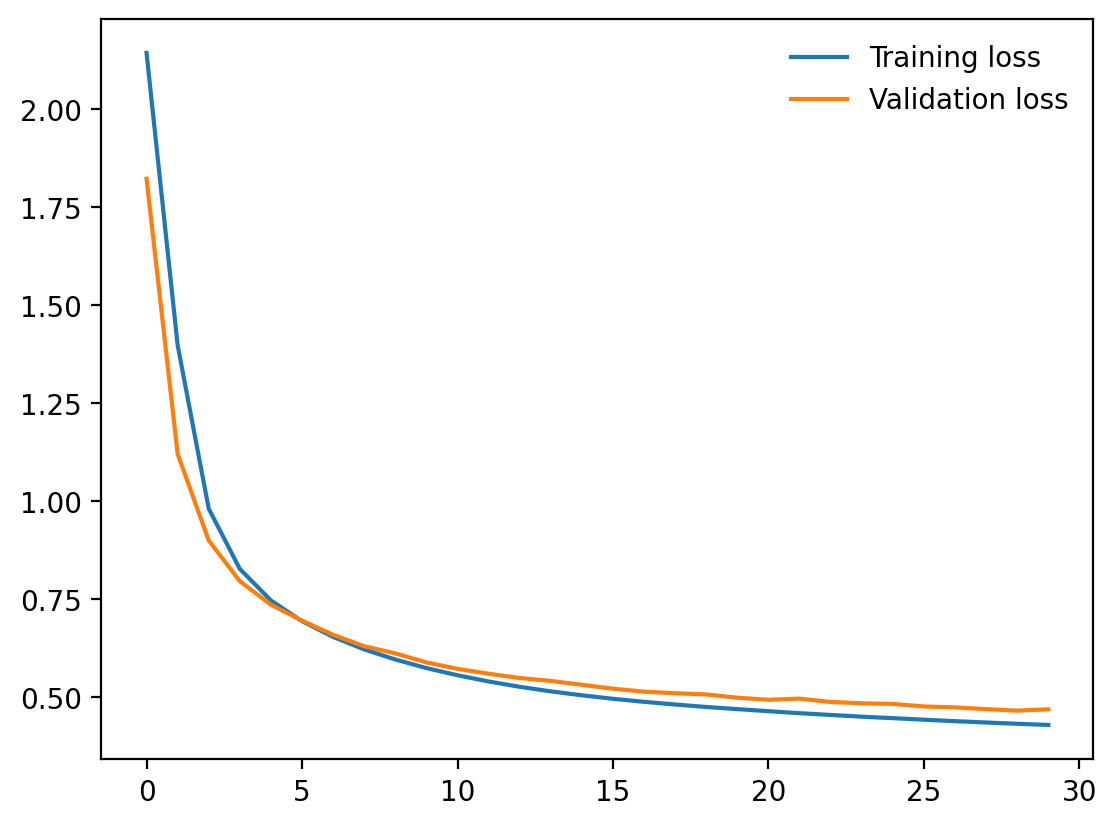

In [61]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [114]:
# But what if we do a more parameter netwrok?
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [115]:
model = Classifier()
criterion = nn.NLLLoss(reduction='sum')
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 30

train_losses, test_losses = [], []
for e in range(epochs):
    tot_train_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        tot_train_loss += loss.item()
        
        loss.backward()
        optimizer.step()
    else:
        tot_test_loss = 0
        test_correct = 0  # Number of correct predictions on the test set
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                loss = criterion(log_ps, labels)
                tot_test_loss += loss.item()

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                test_correct += equals.sum().item()

        # Get mean loss to enable comparison between train and test sets
        train_loss = tot_train_loss / len(trainloader.dataset)
        test_loss = tot_test_loss / len(testloader.dataset)

        # At completion of epoch
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss),
              "Test Loss: {:.3f}.. ".format(test_loss),
              "Test Accuracy: {:.3f}".format(test_correct / len(testloader.dataset)))

Epoch: 1/30..  Training Loss: 0.712..  Test Loss: 0.498..  Test Accuracy: 0.812
Epoch: 2/30..  Training Loss: 0.426..  Test Loss: 0.477..  Test Accuracy: 0.830
Epoch: 3/30..  Training Loss: 0.375..  Test Loss: 0.387..  Test Accuracy: 0.860
Epoch: 4/30..  Training Loss: 0.345..  Test Loss: 0.434..  Test Accuracy: 0.844
Epoch: 5/30..  Training Loss: 0.324..  Test Loss: 0.343..  Test Accuracy: 0.874
Epoch: 6/30..  Training Loss: 0.304..  Test Loss: 0.370..  Test Accuracy: 0.862
Epoch: 7/30..  Training Loss: 0.290..  Test Loss: 0.369..  Test Accuracy: 0.867
Epoch: 8/30..  Training Loss: 0.279..  Test Loss: 0.350..  Test Accuracy: 0.870
Epoch: 9/30..  Training Loss: 0.269..  Test Loss: 0.370..  Test Accuracy: 0.866
Epoch: 10/30..  Training Loss: 0.260..  Test Loss: 0.330..  Test Accuracy: 0.881
Epoch: 11/30..  Training Loss: 0.252..  Test Loss: 0.340..  Test Accuracy: 0.877
Epoch: 12/30..  Training Loss: 0.241..  Test Loss: 0.340..  Test Accuracy: 0.878
Epoch: 13/30..  Training Loss: 0.233.

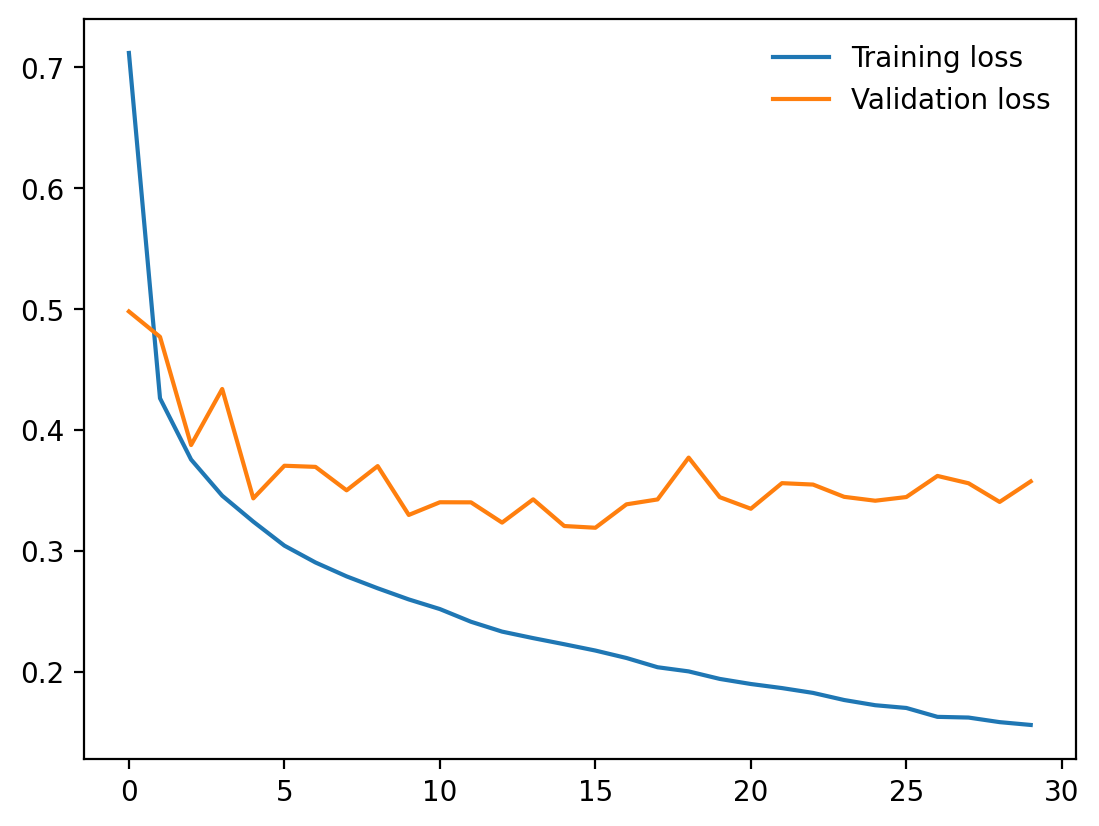

In [116]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

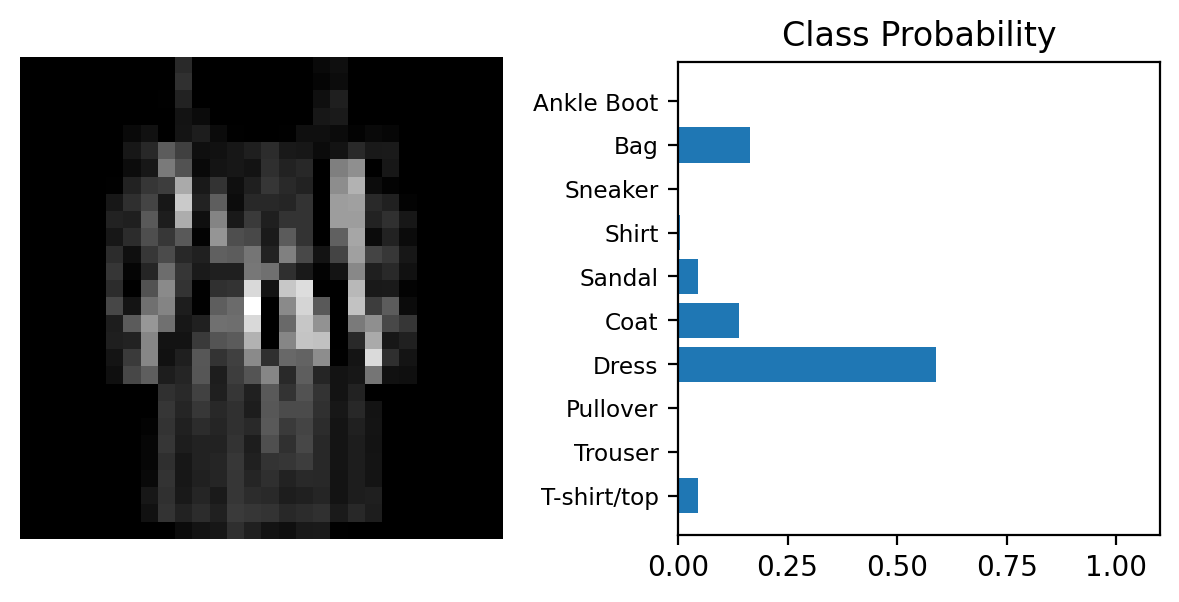

In [93]:
# Grab some data 
dataiter = iter(testloader)
images, labels = next(dataiter)

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = torch.exp(model(images[img_idx,:]))

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

In [83]:
ps

tensor([[-38.2936, -63.9995, -55.2757, -47.3732, -51.8515, -45.7140, -44.4716,
         -49.8367,   0.0000, -43.1737]], grad_fn=<LogSoftmaxBackward0>)

In [100]:
# Intrusive thoughts
from torch import optim

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        
        return x

model = Network()

criterion = lambda x, y: torch.mean((y.view(x.shape) - x) ** 2)
#criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 30
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss at {e}: {running_loss/len(trainloader)}")

Training loss at 0: 2.771855905747363
Training loss at 1: 1.9092534064992404
Training loss at 2: 1.718179954902958
Training loss at 3: 1.6049295320058428
Training loss at 4: 1.5351146183796782
Training loss at 5: 1.4630896788733854
Training loss at 6: 1.422514372670066
Training loss at 7: 1.3828419874916706
Training loss at 8: 1.3392176431442884
Training loss at 9: 1.3024787139028375
Training loss at 10: 1.2715987241280866
Training loss at 11: 1.2492428150639605
Training loss at 12: 1.22001415662674
Training loss at 13: 1.1930150223185005
Training loss at 14: 1.1768380504871991
Training loss at 15: 1.156046222776238
Training loss at 16: 1.1282605772524246
Training loss at 17: 1.1167500636566168
Training loss at 18: 1.0940286528898964
Training loss at 19: 1.0814079130445715
Training loss at 20: 1.0702158865898148
Training loss at 21: 1.0487690664875482
Training loss at 22: 1.0329895254168937
Training loss at 23: 1.0178008625375183
Training loss at 24: 1.0036100064322893
Training loss at

tensor([[ -6.8754,  -9.0688,  -5.2856,  -1.4148,  -0.4267, -11.6014,  -2.3280,
         -18.1766,  -7.3773, -13.1929]], grad_fn=<LogSoftmaxBackward0>)
torch.Size([1, 784])


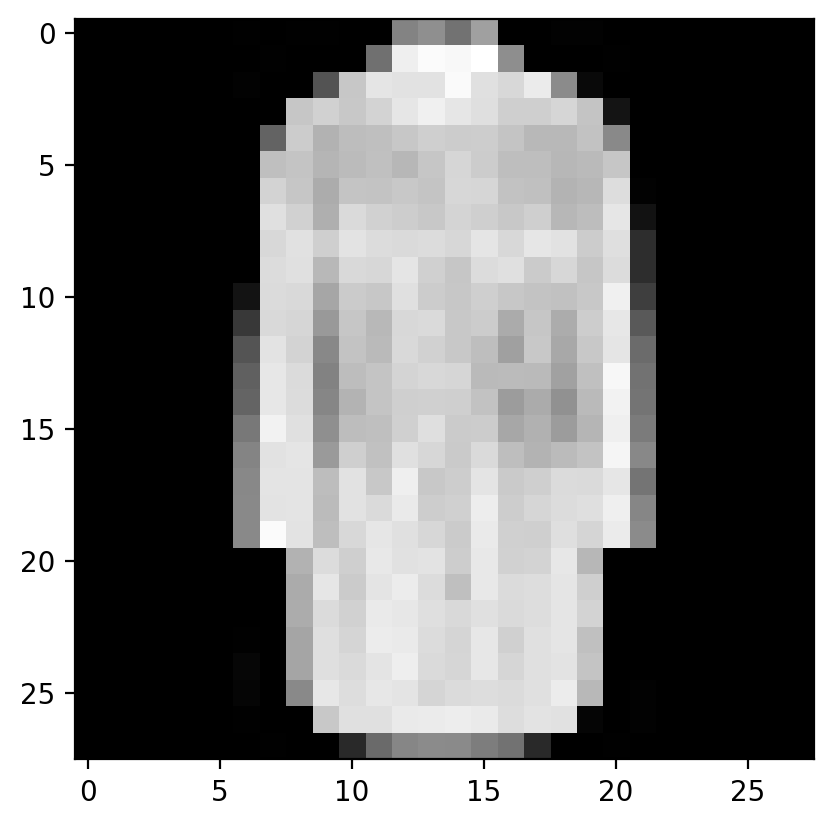

In [191]:
# Grab some data 
dataiter = iter(testloader)
images, labels = next(dataiter)

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
num = model(images[img_idx,:])
print(num)

img = images[img_idx,:]
print(img.shape)
plt.imshow(img.view(28,28), cmap='Greys_r')

We have intuitively discussed differentiability with a negative example above.

### Back to business with our original probablility based model.

We use a technique called Dropout to combat overfitting. Explain dropout.

<img src="https://miro.medium.com/v2/resize:fit:1100/1*WPr205gm0CsQXGa0oltOew.gif"/>

In [194]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with p drop probability
        self.dropout1 = nn.Dropout(p=0.2) # activated and deactivated using model.train() and model.eval() calls
        self.dropout2 = nn.Dropout(p=0.4)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout1(F.relu(self.fc1(x)))
        x = self.dropout2(F.relu(self.fc2(x)))
        x = F.relu(self.fc3(x))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [195]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 100
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/100..  Training Loss: 2.277..  Test Loss: 2.226..  Test Accuracy: 0.311
Epoch: 2/100..  Training Loss: 2.059..  Test Loss: 1.722..  Test Accuracy: 0.357
Epoch: 3/100..  Training Loss: 1.494..  Test Loss: 1.227..  Test Accuracy: 0.557
Epoch: 4/100..  Training Loss: 1.190..  Test Loss: 1.030..  Test Accuracy: 0.618
Epoch: 5/100..  Training Loss: 1.045..  Test Loss: 0.929..  Test Accuracy: 0.624
Epoch: 6/100..  Training Loss: 0.956..  Test Loss: 0.852..  Test Accuracy: 0.672
Epoch: 7/100..  Training Loss: 0.888..  Test Loss: 0.797..  Test Accuracy: 0.692
Epoch: 8/100..  Training Loss: 0.834..  Test Loss: 0.754..  Test Accuracy: 0.711
Epoch: 9/100..  Training Loss: 0.793..  Test Loss: 0.719..  Test Accuracy: 0.735
Epoch: 10/100..  Training Loss: 0.758..  Test Loss: 0.692..  Test Accuracy: 0.747
Epoch: 11/100..  Training Loss: 0.731..  Test Loss: 0.667..  Test Accuracy: 0.753
Epoch: 12/100..  Training Loss: 0.703..  Test Loss: 0.649..  Test Accuracy: 0.753
Epoch: 13/100..  Training

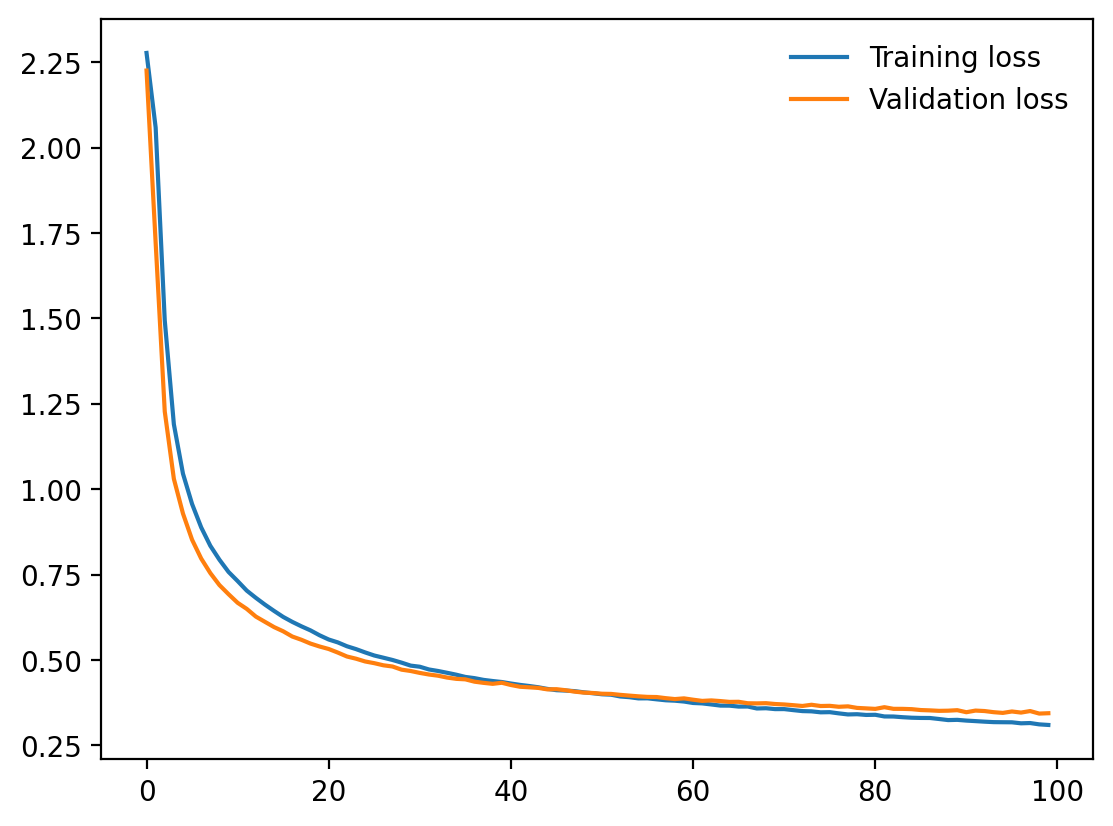

In [196]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

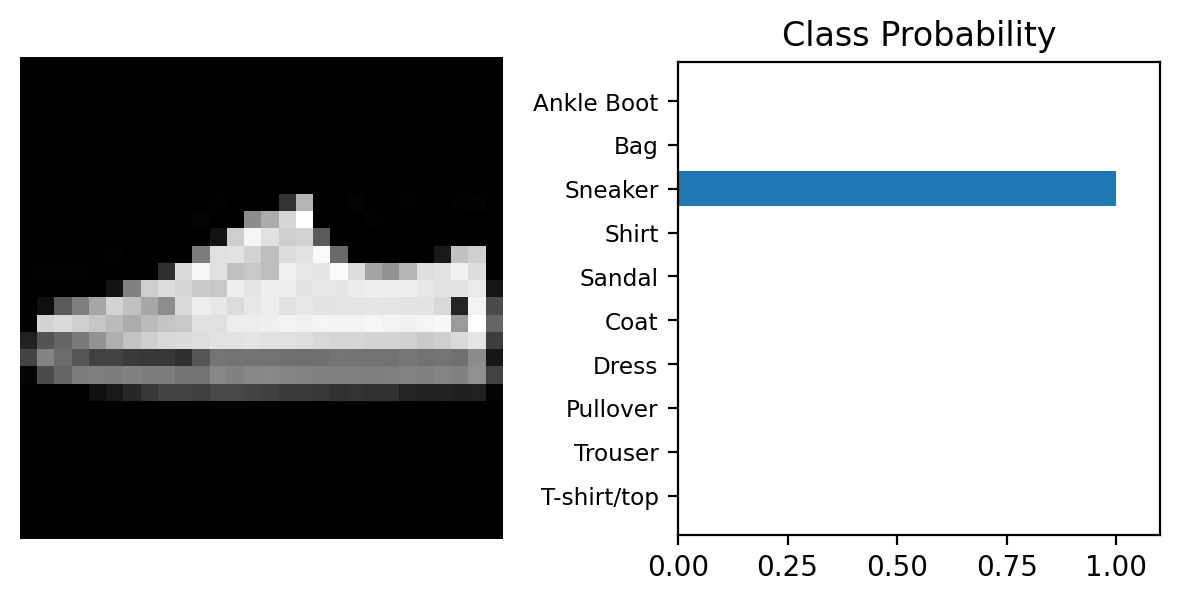

In [205]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = torch.exp(model(images[img_idx,:]))

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)
# more confident

In [193]:
# Q. What dropout probabilities to choose? http://mipal.snu.ac.kr/images/1/16/Dropout_ACCV2016.pdf
# Dropout is one type of REGULARIZATION. We shall discuss others like batch norm, gadient clipping etc. in future 
# in order to improve further we would need to think about the input and our network architecture

In [188]:
# for the heck of it, if we train this model more
epochs = 100
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/100..  Training Loss: 0.360..  Test Loss: 0.362..  Test Accuracy: 0.871
Epoch: 2/100..  Training Loss: 0.360..  Test Loss: 0.360..  Test Accuracy: 0.872
Epoch: 3/100..  Training Loss: 0.361..  Test Loss: 0.358..  Test Accuracy: 0.872
Epoch: 4/100..  Training Loss: 0.358..  Test Loss: 0.361..  Test Accuracy: 0.871
Epoch: 5/100..  Training Loss: 0.358..  Test Loss: 0.358..  Test Accuracy: 0.872
Epoch: 6/100..  Training Loss: 0.358..  Test Loss: 0.360..  Test Accuracy: 0.873
Epoch: 7/100..  Training Loss: 0.360..  Test Loss: 0.357..  Test Accuracy: 0.874
Epoch: 8/100..  Training Loss: 0.358..  Test Loss: 0.358..  Test Accuracy: 0.873
Epoch: 9/100..  Training Loss: 0.355..  Test Loss: 0.356..  Test Accuracy: 0.873
Epoch: 10/100..  Training Loss: 0.356..  Test Loss: 0.358..  Test Accuracy: 0.872
Epoch: 11/100..  Training Loss: 0.359..  Test Loss: 0.357..  Test Accuracy: 0.873
Epoch: 12/100..  Training Loss: 0.357..  Test Loss: 0.356..  Test Accuracy: 0.873
Epoch: 13/100..  Training

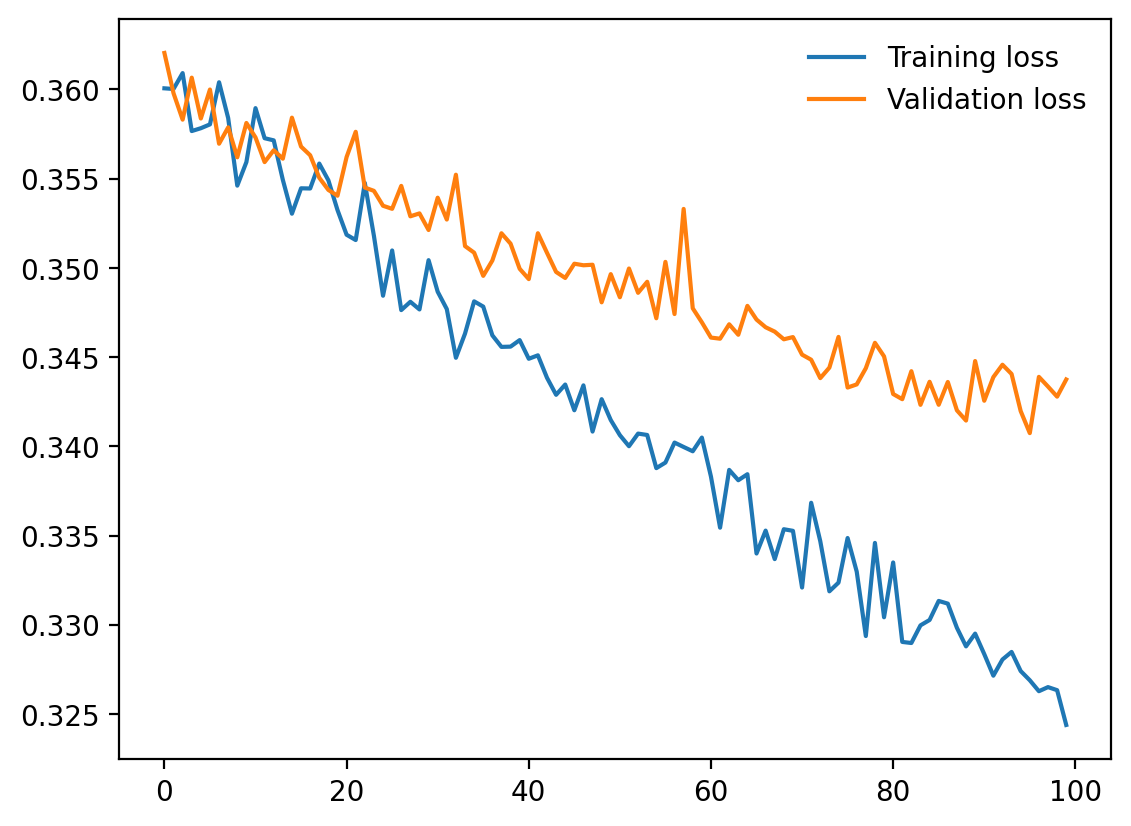

In [190]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)